In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [3]:
os.listdir('drive/My Drive/2019/dataset')

['.DS_Store', 'test_set', 'training_set', 'all_classes', ' (1).DS_Store']

In [4]:
from PIL import Image
image = Image.open('drive/My Drive/2019/dataset/training_set/cats/cat.928.jpg')
image.size

(500, 435)

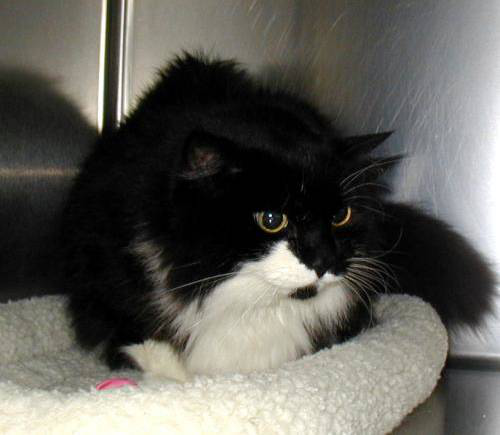

In [0]:
image

# Convolutional NN

In [0]:
from keras.models import Sequential # class of NN
from keras.layers import Convolution2D # class for adding convulution
from keras.layers import MaxPooling2D # pooling layer class
from keras.layers import Flatten # flatten layer class
from keras.layers import Dense # other normal layer in nn

Using TensorFlow backend.


In [0]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Convolution2D(filters= 32,
                             kernel_size= (3, 3), 
                             input_shape = (64, 64, 3),
                             activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(filters = 32,
                             kernel_size = (3, 3), 
                             activation = 'relu'))
# adding a second maxpooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [0]:
# Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [0]:
ts= train_datagen.flow_from_directory(
        'drive/My Drive/2019/dataset/training_set',
        target_size = (64, 64),
        batch_size = 100,
        class_mode = 'binary')
tx = test_datagen.flow_from_directory(
        'drive/My Drive/2019/dataset/test_set',
        target_size = (64, 64),
        batch_size = 100,
        class_mode = 'binary')

Found 8009 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
history = classifier.fit_generator(ts,
                         steps_per_epoch= 8000//100,
                         epochs=10,
                         validation_data = tx,
                         validation_steps= 2000)

23/80 [=======>......................] - ETA: 31:42 - loss: 0.7023 - acc: 0.5030

In [0]:
classifier.save('catvsdog')